In [33]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [34]:
# import functions from modsim

from modsim import *

In [35]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/chap11.py')

In [36]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/chap12.py')

In [37]:
# import code from previous notebooks

from chap11 import make_system
from chap11 import update_func
from chap11 import run_simulation
from chap11 import plot_results

from chap12 import calc_total_infected

In [38]:
from modsim import System, State, linspace, SweepSeries, SweepFrame
import matplotlib.pyplot as plt



In [39]:
beta_array_covid = linspace(0.1, 1.1, 11)
gamma_array_covid = linspace(0.1, 0.7, 4)
days_covid = 100

In [40]:
def update_covid_func(state, t, system):
    s, i, r = state
    infected = system.beta * i * s
    recovered = system.gamma * i
    ds = -infected
    di = infected - recovered
    dr = recovered
    return State(s=s + ds, i=i + di, r=r + dr)

In [41]:
def run_simulation_covid(system, update_func):
    state = State(s=system.init_s, i=system.init_i, r=system.init_r)
    results = TimeSeries()

    for t in linrange(0, system.t_end):
        results[t] = state
        state = update_func(state, t, system)

    return results

In [42]:
def sweep_beta_covid(beta_array, gamma):
    sweep = SweepSeries()
    for beta in beta_array:
        system = System(beta=beta, gamma=gamma, init_s=0.99, init_i=0.01, init_r=0, t_end=days_covid)
        results = run_simulation_covid(system, update_covid_func)
        sweep[beta] = results[days_covid]['i']  # Store the fraction infected at the end of simulation
    return sweep

In [43]:
def sweep_parameters_covid(beta_array, gamma_array, days):
    frame = SweepFrame(columns=gamma_array)
    for gamma in gamma_array:
        frame[gamma] = sweep_beta_covid(beta_array, gamma)
    return frame

In [44]:
frame_covid = sweep_parameters_covid(beta_array_covid, gamma_array_covid, days_covid)


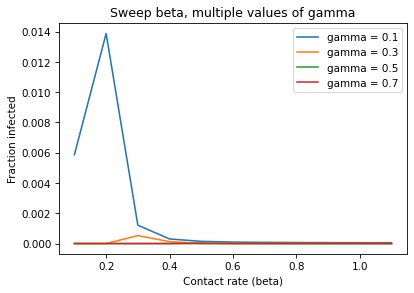

In [48]:
for gamma in gamma_array_covid:
    label = f'gamma = {gamma}'
    frame_covid[gamma].plot(label=label)

# Decorate the plot
plt.xlabel('Contact rate (beta)')
plt.ylabel('Fraction infected')
plt.title('Sweep beta, multiple values of gamma')
plt.legend(loc='upper right')
plt.show()